# Analysis of a fixed end beam using the finite element proposed by Kartunnen & Von Hertzen in the article: **Exact theory for a linearly elastic interior beam**

**Source:**
<a href="https://doi.org/10.1016/j.ijsolstr.2015.09.010">Exact theory for a linearly elastic interior beam. Kartunnen, von Hertzen, 2016.</a>

### By: Alejandro Hincapié Giraldo


To develop the theory we must suppose the model of a section of beam, but taking it as a 2D solid under a plane stress case:

<img src="https://github.com/alejohg/Kartunnen-Hertzen-FE/blob/master/modelo_2d.png?raw=1">

In this model p represents a pressure applied on the upper face of the beam (Units of Force/Area)

Then, the following restraints must be taken into account:
- The beam section must be rectangular (t x h) and constant across the entire length
- The superficial load applied on the upper face can only be constant
- Linearly elastic material

## Previous basic notions

### Axial force, shear force and bending moment equations in beams:

$$N(x) = t \int_{-h/2}^{h/2} \sigma_x(x,y)dy$$

$$M(x) = t \int_{-h/2}^{h/2} \sigma_x(x,y)ydy$$

$$Q(x) = t \int_{-h/2}^{h/2} \tau_{xy}(x,y)dy$$

#### Boundary conditions:

$$\sigma_y(x,h/2) = -p$$

$$\sigma_y(x,-h/2) = 0$$

$$\tau_{xy}(x,\pm h/2) = 0$$

### Airy stress function:
It is a function $\psi(x,y)$ that satisfies the biharmonic equation:

$$\frac{\partial^4 \psi}{\partial x^4} + 2\frac{\partial^4 \psi}{\partial x^2 \partial y^2} + \frac{\partial^4 \psi}{\partial y^4} = 0$$

The stresses can be obtained from this function through the following formulas:

$\sigma_x = \frac{\partial^2 \psi}{\partial y^2}$;
$\sigma_y = \frac{\partial^2 \psi}{\partial x^2}$;
$\tau_{xy} = -\frac{\partial^2 \psi}{\partial x \partial y}$

By adapting the procedure presented in *Elasticity (Barber, 2010, cap.5)* we obtain that the polynomic form for the Airy stress function for the beam presented before is:

$$\psi(x,y) = c_{1} y^{2} + c_{2} y^{3} + c_{3} x y \left(1 - \frac{4 y^{2}}{3 h^{2}}\right) - \frac{q}{240 I} \left(5 h^{3} x^{2} + 15 h^{2} x^{2} y + 4 y^{3} \left(- 5 x^{2} + y^{2}\right)\right)$$

where $q = pt$ is the uniform load per unit of length, $I = th^3/12$ is the moment of inertia of the beam section

## Step-by-step deduction of the proposed equations

Below is a brief summary of each step to follow in the process of deducing the equations presented in the article. Each deduction is accompanied by its respective Python code snippets, in which, using the Sympy library, the symbolic expressions are quickly manipulated, aiming to reach the same equations as those presented in the article.
However, it should be clarified that the equations obtained will not be **exactly the same** as those presented in the article, since the authors simplify and factor them using basic algebraic procedures that are not only difficult to perform in Sympy, but also unnecessary and inefficient. Nevertheless, all the formulas obtained were verified and compared with their counterparts in the article to confirm that they are equivalent expressions in every case.
To begin the deductions, the necessary libraries are imported and symbolic variables are defined:

In [ ]:
import sympy as sp
import pandas as pd

x, y, z, t, h, q, I, c1, c2, c3, A, N, M, Q, L = sp.symbols('x y z t h q I c1 '
                                                            'c2 c3 A N M Q L')
sp.init_printing()

def my_print(var, nombre):
    print('\n', 80*'~')
    if nombre != '':
        print(f'{nombre} =\n')
    else:
        print()
    sp.pprint(var)

### Calculation of stresses

The stresses $\sigma_x, \sigma_y, \tau_{xy}$ can be calculated simply by differentiating the Airy stress function $\psi(x,y)$ presented above. After running the code shown below, we obtain:

$$\sigma_x =  2 c_{1} + 6 c_{2} y - \frac{8 c_{3} x y}{h^{2}} - \frac{q y \left(- 3 x^{2} + 2 y^{2}\right)}{6 I}$$
$$\sigma_y =  - \frac{q \left(h^{3} + 3 h^{2} y - 4 y^{3}\right)}{24 I}$$
$$\tau_{xy} =  - c_{3} + \frac{4 c_{3} y^{2}}{h^{2}} + \frac{h^{2} q x}{8 I} - \frac{q x y^{2}}{2 I}$$

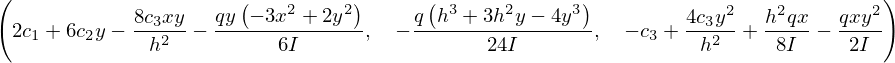

In [ ]:
# %% Función de tensión de Airy

psi = (c1*y**2 + c2*y**3 + c3*x*y*(1-4*y**2/(3*h**2))
       - q/(240*I)*(5*h**3*x**2 + 15*h**2*x**2*y + 4*y**3*(y**2-5*x**2)))

# %% Esfuerzos:
sx = sp.diff(psi, y, 2)
sy = sp.diff(psi, x, 2)
txy = sp.simplify(-sp.diff(psi, x, y))

sx,sy,txy

### Equations for Moment, Shear, and Axial Force:

By integrating the previously calculated stresses over the cross-section, we obtain: the axial force, the bending moment, and the shear force. The code yields the following results:

$$N = 2 c_{1} h t$$
$$M = \frac{c_{2} h^{3} t}{2} - \frac{2 c_{3} h t x}{3} - \frac{h^{5} q t}{240 I} + \frac{h^{3} q t x^{2}}{24 I}$$
$$Q = - \frac{2 c_{3} h t}{3} + \frac{h^{3} q t x}{12 I}$$

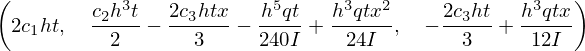

In [ ]:
# %% Fuerzas normal, momento y cortante:

N_x = t*sp.integrate(sx, (y, -h/2, h/2))
M_x = sp.expand(t*sp.integrate(sx*y, (y, -h/2, h/2)))
Q_x = sp.expand(t*sp.integrate(txy, (y, -h/2, h/2)))

N_x, M_x, Q_x

The derivatives can be verified to satisfy the beam equilibrium equations:

$\frac{\partial N}{\partial x} = 0$

$\frac{\partial M}{\partial x} = Q$

$\frac{\partial Q}{\partial x} = q$

In [ ]:
# %% Se verifican las derivadas:

print('Verificación de las ecuaciones:')
print(f'dN/dx = 0: {sp.diff(N_x, x) == 0}')
print(f'dM/dx = Q: {sp.diff(M_x, x) - Q_x == 0}')
print(f'dQ_dx = q: {sp.diff(Q_x.subs(t, 12*I/h**3), x) - q == 0}')

Verificación de las ecuaciones:
dN/dx = 0: True
dM/dx = Q: True
dQ_dx = q: True


### Relationships between stresses and equivalent forces:

From the three expressions obtained for N, M, and Q, the three constants c1, c2, and c3 can be found by solving a 3x3 system of equations, and then substituted into the stress expressions, yielding:

$$\sigma_x = \frac{12 M y}{h^{3} t} + \frac{N}{h t} + \frac{h^{2} q y}{20 I} - \frac{q y^{3}}{3 I} $$
$$\tau_{xy} = \frac{3 Q}{2 h t} - \frac{6 Q y^{2}}{h^{3} t}$$

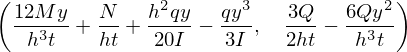

In [ ]:
# %% Se hallan las constantes c1, c2 y c3:

eq1 = N - N_x  # N = 2*A*c1
eq2 = Q - Q_x  # Q = q*x - 2/3*A*c3
eq3 = M - M_x  # M = 6*I*c2 - 2/3*A*c3*x + q/2*(x^2 - h^2/10)

sol = sp.solve([eq1, eq2, eq3], [c1, c2, c3])

# %% Se reemplazan los valores de c1, c2 y c3 en las fórmulas de sx y sy

Sx = sp.expand(sx.subs([(c1, sol[c1]), (c2, sol[c2]), (c3, sol[c3])]))
Txy = sp.expand(txy.subs([(c1, sol[c1]), (c2, sol[c2]), (c3, sol[c3])]))

Sx, Txy

### Beam displacement field

The strains in a 2D solid under plane stress are given by:

$$\epsilon_x = \frac{\sigma_x - \nu \sigma_y}{E}$$

$$\epsilon_y = \frac{\sigma_y - \nu \sigma_x}{E}$$

$$\gamma_{xy} = \frac{\tau_{xy}}{G}$$

and they are related to the displacements through:

$$\epsilon_x = \frac{\partial U_x}{\partial x}$$

$$\epsilon_y = \frac{\partial U_y}{\partial y}$$

$$\gamma_{xy} = \frac{\partial U_x}{\partial y} + \frac{\partial U_y}{\partial x}$$

From the stress expressions obtained above, the strains can be written as:

$$\epsilon_x = \frac{2 c_{1} + 6 c_{2} y - \frac{8 c_{3} x y}{h^{2}} + \frac{\nu q \left(h^{3} + 3 h^{2} y - 4 y^{3}\right)}{24 I} - \frac{q y \left(- 3 x^{2} + 2 y^{2}\right)}{6 I}}{E} $$

$$\epsilon_y = \frac{- \nu \left(2 c_{1} + 6 c_{2} y - \frac{8 c_{3} x y}{h^{2}} - \frac{q y \left(- 3 x^{2} + 2 y^{2}\right)}{6 I}\right) - \frac{q \left(h^{3} + 3 h^{2} y - 4 y^{3}\right)}{24 I}}{E}$$

$$\gamma_{xy} = \frac{\left(2 \nu + 2\right) \left(- c_{3} + \frac{4 c_{3} y^{2}}{h^{2}} + \frac{h^{2} q x}{8 I} - \frac{q x y^{2}}{2 I}\right)}{E}$$

Integrating the equations for $\epsilon_x$ and $\epsilon_y$ yields the displacements $U_x$ and $U_y$, which introduces two arbitrary functions $f(y)$ and $g(x)$ to be determined by substituting these displacements into the equation for $\gamma_{xy}$. The following code differentiates the expressions for $Ux(x,y)$ and $Uy(x,y)$ and shows the step-by-step procedure, since obtaining these displacements is somewhat cumbersome and too lengthy to detail here. The resulting expressions are:

$$Ux(x,y) = - \frac{C y}{E} + \frac{D_{1}}{E} + c_{3} \left(- \frac{2 \nu y}{E} - \frac{2 y}{E} + \frac{4 \nu y^{3}}{3 E h^{2}} - \frac{4 x^{2} y}{E h^{2}} + \frac{8 y^{3}}{3 E h^{2}}\right) + q x \left(\frac{h^{3} \nu}{24 E I} + \frac{h^{2} \nu y}{8 E I} - \frac{\nu y^{3}}{6 E I} - \frac{y^{3}}{3 E I}\right) + \frac{2 c_{1} x}{E} + \frac{6 c_{2} x y}{E} + \frac{q x^{3} y}{6 E I}$$

$$Uy(x,y) = \frac{C x}{E} + \frac{D_{2}}{E} + c_{2} \left(- \frac{3 \nu y^{2}}{E} - \frac{3 x^{2}}{E}\right) + c_{3} \left(\frac{4 \nu x y^{2}}{E h^{2}} + \frac{4 x^{3}}{3 E h^{2}}\right) + q \left(- \frac{h^{3} y}{24 E I} + \frac{h^{2} \nu x^{2}}{16 E I} + \frac{h^{2} x^{2}}{8 E I} - \frac{h^{2} y^{2}}{16 E I} - \frac{\nu x^{2} y^{2}}{4 E I} + \frac{\nu y^{4}}{12 E I} - \frac{x^{4}}{24 E I} + \frac{y^{4}}{24 E I}\right) - \frac{2 c_{1} \nu y}{E}$$





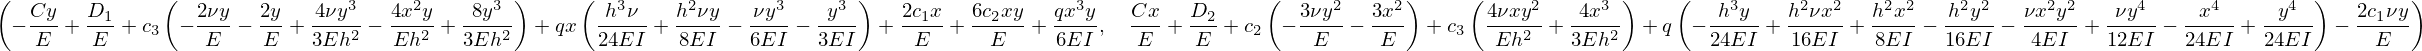

In [ ]:
# %% Se definen nuevas variables simbólicas:

E, G, nu, C, C1, C2, D1, D2 = sp.symbols('E G nu C C1 C2 D1 D2')
f = sp.Function('f')(y)
g = sp.Function('g')(x)

# %% Se definen las deformaciones para tensión plana:

G = E/(2*(1+nu))

ex = (sx - nu*sy)/E
ey = (sy - nu*sx)/E
gxy = txy/G


# %% Se integran las deformaciones para obtener los desplazamientos:

U_x = sp.integrate(ex, x) + f
U_y = sp.integrate(ey, y) + g

gxy_ = sp.diff(U_x, y) + sp.diff(U_y, x)

# %%

tmp = (gxy - gxy_)

# %% Para encontrar f(y) derivamos tmp respecto a y

dtmp_dy = tmp.diff(y)

sol = sp.solve(dtmp_dy, f.diff(y, 2))

d2f_dy2 = sol[0]

df_dy = sp.integrate(d2f_dy2, y) + C1

f_y = sp.integrate(df_dy, y) + D1

# %% Para encontrar g(x) se deriva tmp respecto a x

dtmp_dx = tmp.diff(x)

sol = sp.solve(dtmp_dx, g.diff(x, 2))

d2g_dx2 = sol[0]

dg_dx = sp.integrate(d2g_dx2, x) + C2

g_x = sp.integrate(dg_dx, x) + D2


# %% Se reemplazan las derivadas de f(y) y g(x) en gxy:

tmp2 = tmp.subs([(f.diff(y), df_dy), (g.diff(x), dg_dx)]).simplify()

sol = sp.solve(tmp2, C1)

C_1 = sol[0]

f_y = f_y.subs(C1, C_1)

# %% Se reemplazan las funciones halladas f(y) y g(x) en Ux y Uy:

Ux = U_x.subs(f, f_y)

Uy = U_y.subs(g, g_x)


# %% Se define una constante C = C2*E, que se reemplaza en ambas expresiones:
# Al ser D1 y D2 constantes arbitrarias, se hace D1 = D1/E y D2 = D2/E

Ux = Ux.subs([(C2, C/E), (D1, D1/E), (D2, D2/E)]).expand().collect(c3).collect(q*x)

Uy = Uy.subs([(C2, C/E), (D1, D1/E), (D2, D2/E)]).expand().collect(c2).collect(c3).collect(q)


Ux, Uy

### Displacements on the neutral axis:

Finally, to derive the finite beam element, the **displacements of the central axis** (*central axis variables*) are formulated. These are simply the displacement field evaluated along the neutral axis, which, according to the reference coordinate system, consists of all points located at y=0. In other words, the displacement field is evaluated on the neutral axis, and through the corresponding code the following expressions are obtained:

- Horizontal displacement:  
$$u_x(x) = U_x(x,0) = \frac{D_{1}}{E} + \frac{2 c_{1} x}{E} + \frac{h^{3} \nu q x}{24 E I}$$

- Vertical displacement:  
$$u_y(x) = U_y(x,0) = \frac{C x}{E} + \frac{D_{2}}{E} + q \left(\frac{h^{2} \nu x^{2}}{16 E I} + \frac{h^{2} x^{2}}{8 E I} - \frac{x^{4}}{24 E I}\right) - \frac{3 c_{2} x^{2}}{E} + \frac{4 c_{3} x^{3}}{3 E h^{2}}$$

- Cross-sectional rotation:  
$$\phi(x) = \frac{\partial U_x}{\partial y}(x,0) = - \frac{C}{E} + c_{3} \left(- \frac{2 \nu}{E} - \frac{2}{E} - \frac{4 x^{2}}{E h^{2}}\right) + \frac{6 c_{2} x}{E} + \frac{h^{2} \nu q x}{8 E I} + \frac{q x^{3}}{6 E I}$$


### 2D displacement field in terms of central displacements

Using the previous expressions, the previously computed displacement field can be expressed in terms of the central displacements $u_x, u_y, phi$. In equations (21) and (22), the article proposes the following relations:

$$U_x(x,y) = \frac{\nu y^{3} \frac{d^{2}}{d x^{2}} \phi{\left (x \right )}}{6} + y \phi{\left (x \right )} + \operatorname{u_{x}}{\left (x \right )} - \frac{4 y^{3} \left(\phi{\left (x \right )} + \frac{d}{d x} \operatorname{u_{y}}{\left (x \right )}\right)}{3 h^{2}}$$
$$U_y(x,y) = - \frac{\nu y^{2} \frac{d}{d x} \phi{\left (x \right )}}{2} - \nu y \frac{d}{d x} \operatorname{u_{x}}{\left (x \right )} + \operatorname{u_{y}}{\left (x \right )} + \frac{q y \left(h^{2} \left(2 h + 3 y\right) \left(\nu^{2} - 1\right) + 2 y^{3} \left(2 \nu + 1\right)\right)}{48 E I}$$

In this case, instead of differentiating them (which would involve algebraic and calculus manipulations that are difficult to carry out using Sympy), the approach will be to verify that the expressions presented in the article are correct. This will be done by substituting the previously derived expressions for the central displacements into the formulas proposed in the article and checking that they coincide with the respective expressions for the 2D displacement field. This verification will be implemented in the following code:


Ux = Ux_c: True
Uy = Uy_c: True


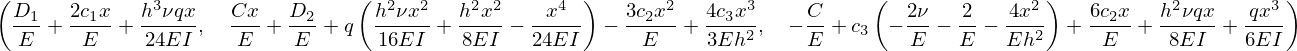

In [ ]:
# %% Se calculan los desplazamientos en el eje neutro (y=0):

ux = Ux.subs(y, 0)

uy = Uy.subs(y, 0)

phi = Ux.diff(y).subs(y, 0)

# %% Del artículo se tienen las ecuaciones de los desplazamientos Ux, Uy en
# términos de los despl. del eje central. Se verifican:

Ux_c = ux + y*phi - 4*y**3/(3*h**2)*(phi + uy.diff(x)) + nu*y**3/6*phi.diff(x, 2)

Uy_c = (uy - nu*y*ux.diff(x) - nu*y**2/2*phi.diff(x)
        + q*y/(48*E*I)*((2*h+3*y)*(nu**2-1)*h**2 + 2*y**3*(1+2*nu)))

# Se reporta el resultado:
print(f'Ux = Ux_c: {(Ux - Ux_c).simplify() == 0}')
print(f'Uy = Uy_c: {(Uy - Uy_c).simplify() == 0}')

ux, uy, phi

### Strains in terms of central displacements

Given the expressions for the displacements $U_x$ and $U_y$, these can be differentiated to obtain the strains:

$$\epsilon_x = y \frac{d}{d x} \phi{\left (x \right )} + \frac{d}{d x} \operatorname{u_{x}}{\left (x \right )} - \frac{q y^{3} \left(\nu + 2\right)}{6 E I}$$

$$\epsilon_y = - \nu y \frac{d}{d x} \phi{\left (x \right )} - \nu \frac{d}{d x} \operatorname{u_{x}}{\left (x \right )} + \frac{h^{3} \nu^{2} q}{24 E I} - \frac{h^{3} q}{24 E I} + \frac{h^{2} \nu^{2} q y}{8 E I} - \frac{h^{2} q y}{8 E I} + \frac{\nu q y^{3}}{3 E I} + \frac{q y^{3}}{6 E I}$$

$$\gamma_{xy} = \left(1 - \frac{4 y^{2}}{h^{2}}\right) \left(\phi{\left (x \right )} + \frac{d}{d x} \operatorname{u_{y}}{\left (x \right )}\right)$$




 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
ex_c (recalculada) =

                            3        
  d          d           q⋅y ⋅(ν + 2)
y⋅──(φ(x)) + ──(uₓ(x)) - ────────────
  dx         dx             6⋅E⋅I    

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
ey_c =

                                3  2       3       2  2        2            3 
      d            d           h ⋅ν ⋅q    h ⋅q    h ⋅ν ⋅q⋅y   h ⋅q⋅y   ν⋅q⋅y  
- ν⋅y⋅──(φ(x)) - ν⋅──(uₓ(x)) + ─────── - ────── + ───────── - ────── + ────── 
      dx           dx           24⋅E⋅I   24⋅E⋅I     8⋅E⋅I     8⋅E⋅I    3⋅E⋅I  

      3
   q⋅y 
+ ─────
  6⋅E⋅I

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
gxy_c (recalculada) =

⎛       2⎞                    
⎜    4⋅y ⎟ ⎛       d         ⎞
⎜1 - ────⎟⋅⎜φ(x) + ──(u_y(x))⎟
⎜      2 ⎟ ⎝       dx        ⎠
⎝     h  ⎠                    


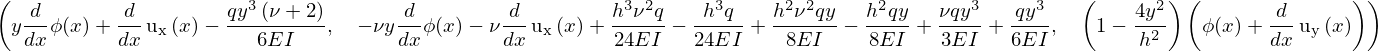

In [ ]:
# %% Se calculan las deformaciones en términos de los despl. del eje central:

# Primero se definen los DEC como funciones de x:
u_x = sp.Function('u_x')(x)
u_y = sp.Function('u_y')(x)
phi_ = sp.Function('phi')(x)


# Se definen nuevamente los desplazamientos en términos de los DEC:
Ux_c = u_x + y*phi_ - 4*y**3/(3*h**2)*(phi_ + u_y.diff(x)) + nu*y**3/6*phi_.diff(x, 2)

Uy_c = (u_y - nu*y*u_x.diff(x) - nu*y**2/2*phi_.diff(x)
        + q*y/(48*E*I)*((2*h+3*y)*(nu**2-1)*h**2 + 2*y**3*(1+2*nu)))

# Se calculan las deformaciones:
ex_c = sp.diff(Ux_c, x).expand().collect(E)
ey_c = sp.diff(Uy_c, y).expand().collect(Q)
gxy_c = (sp.diff(Ux_c, y) + sp.diff(Uy_c, x)).expand().collect(E)


''' Al ver la expresión resultante de ex_c y compararla con la obtenida en el
    artículo, resulta evidente que dos términos coinciden pero hay 3 términos
    que "sobran" mientras en la expresión del artículo sobra solo 1. Sería ló-
    gico suponer que son expresiones equivalentes, pero se debe demostrar, lo
    cuál se hará a continuación.

    Igualmente para el primer término de gxy.
'''
# %% Proceso complementario para verificar la expresión "sobrante" de ex_c:

expr = ex_c - y*phi_.diff(x) - u_x.diff(x)  # expr es lo que "sobra" de ex_c

# Se sustituyen las derivadas de phi y uy (simbólicas) por las derivadas de las
# expresiones de phi y uy obtenidas previamente.

expr_ = expr.subs([(u_y.diff(x,2), uy.diff(x,2)), (phi_.diff(x,3),
                   phi.diff(x,3)), (phi_.diff(x), phi.diff(x))]).simplify()

# Luego, esta expresión calculada se reemplaza en la fórmula de ex_c:

ex_c = ex_c - expr + expr_

# %% Se realiza un proceso similar para ajustar gxy_c al result. del artículo:

expr = gxy_c - (1 - 4*y**2/h**2)*(phi_ + u_y.diff(x))  # Expr. "sobrante" de gxy_

expr_ = expr.subs(u_x.diff(x,2), ux.diff(x,2)).simplify()

# Y se reemplaza en gxy_c:

gxy_c = gxy_c - expr + expr_


# %% Se reportan resultados de las deformaciones en términos de los DEC:

my_print(ex_c, 'ex_c (recalculada)')
my_print(ey_c, 'ey_c')
my_print(gxy_c, 'gxy_c (recalculada)')

ex_c, ey_c, gxy_c

### Equivalent forces in terms of central displacements

Finally, the equations for M, Q, and N can be obtained in terms of the central displacements. To this end, the previously calculated strains are substituted into the plane stress stress–strain relations, and then integrated over the cross-section. After running the corresponding code, the following expressions are obtained:

$$N = t \left(E h \frac{d}{d x} \operatorname{u_{x}}{\left (x \right )} - \frac{h \nu q}{2 t}\right)$$

$$M = \frac{E h^{3} t \frac{d}{d x} \phi{\left (x \right )}}{12} - \frac{h^{2} \nu q}{8} - \frac{h^{2} q}{20}$$

$$Q = \frac{E h t \left(\phi{\left (x \right )} + \frac{d}{d x} \operatorname{u_{y}}{\left (x \right )}\right)}{3 \left(\nu + 1\right)}$$


In [ ]:
# %% Se definen nuevas variables simbólicas

sigma_x, sigma_y, tau_xy, epsilon_x, epsilon_y, gamma_xy = sp.symbols('sigma_x sigma_y tau_xy epsilon_x epsilon_y gamma_xy')

# Se establecen las relaciones simbólicas esfuerzo - deformación:
e_x = (sigma_x - nu*sigma_y)/E
e_y = (sigma_y - nu*sigma_x)/E
g_xy = tau_xy/G

# Y se hallan las expresiones para los esfuerzos:
sol = sp.solve((epsilon_x - e_x, epsilon_y - e_y, gamma_xy - g_xy), (sigma_x, sigma_y, tau_xy))

s_x, s_y, t_xy = sol.values()  # Asigno estos valores a unas variables nuevas

my_print(s_x, 's_x')
my_print(s_y, 's_y')
my_print(t_xy, 't_xy')

my_print('', '')


# %% Reemplazo los valores de las deformaciones en términos de los DEC:

s_x = s_x.subs([(epsilon_x, ex_c), (epsilon_y, ey_c)])
s_y = s_y.subs([(epsilon_x, ex_c), (epsilon_y, ey_c)])
t_xy = t_xy.subs(gamma_xy, gxy_c)

# %% Calculo las fuerzas de equilibrio con las expresiones anteriores:

N_ = t*sp.integrate(s_x, (y, -h/2, h/2)).subs(I, t*h**3/12).expand()
my_print(N_, 'N(x)')

M_ = (t*sp.integrate(s_x*y, (y, -h/2, h/2))).subs(I, t*h**3/12).expand()
my_print(M_, 'M(x)')

Q_ = sp.expand(t*sp.integrate(t_xy, (y, -h/2, h/2))).subs(I, t*h**3/12).simplify()
my_print(Q_, 'Q(x)')

my_print('', '')


# %% Se reemplazan estas expresiones en las eqns de equilibrio:

dN_dx = N_.diff(x).subs(t, A/h)
dM_dx = M_.diff(x).subs(t, 12*I/h**3)
dQ_dx = Q_.diff(x).subs(t, A/h)

my_print(dN_dx, 'dN/dx = 0')
my_print(dM_dx - Q_, 'dM/dx - Q = 0')
my_print(dQ_dx - q, 'dQ/dx - q = 0')



 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
s_x =

-E⋅(εₓ + ε_y⋅ν) 
────────────────
      2         
     ν  - 1     

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
s_y =

-E⋅(εₓ⋅ν + ε_y) 
────────────────
      2         
     ν  - 1     

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
t_xy =

  E⋅γ_xy 
─────────
2⋅(ν + 1)

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
N(x) =

  ⎛    d           h⋅ν⋅q⎞
t⋅⎜E⋅h⋅──(uₓ(x)) - ─────⎟
  ⎝    dx           2⋅t ⎠

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
M(x) =

   3   d                       
E⋅h ⋅t⋅──(φ(x))    2        2  
       dx         h ⋅ν⋅q   h ⋅q
─────────────── - ────── - ────
       12           8       20 

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

### Energetic aspects of the theory

This section presents an approach to the behavior of the analyzed beam from the perspective of energy. First, the strain energy of the solid (denoted as **U** in this case) is considered:

$$U = \iiint_V (\sigma_x \epsilon_x + \sigma_y \epsilon_y + \tau_{xy} \gamma_{xy})dV$$

By substituting the previously derived expressions for the stresses and strains, one obtains:

$$U = \frac{8 I L^{3} c_{3}^{2}}{3 E h^{4}} + \frac{24 I L c_{1}^{2}}{E h^{2}} + \frac{18 I L c_{2}^{2}}{E} + \frac{32 I L c_{3}^{2} \nu}{5 E h^{2}} + \frac{32 I L c_{3}^{2}}{5 E h^{2}} + \frac{L^{3} c_{2} q}{4 E} + \frac{L c_{1} h \nu q}{E} + \frac{3 L c_{2} h^{2} \nu q}{5 E} - \frac{3 L c_{2} h^{2} q}{10 E} + \frac{L^{5} q^{2}}{640 E I} + \frac{L^{3} h^{2} \nu q^{2}}{80 E I} + \frac{L^{3} h^{2} q^{2}}{160 E I} - \frac{L h^{4} \nu q^{2}}{210 E I} + \frac{19 L h^{4} q^{2}}{1120 E I}$$

Next, the work performed by the load **q** applied on the upper surface of the beam is considered, given by:

$$W_q = -\int_{-L/2}^{L/2} q Uy(x,h/2) dx$$

By substituting the expression for $U_y$, one obtains:

$$W_q = \frac{L^{5} q^{2}}{1920 E I} - \frac{L^{3} \left(- 24 I c_{2} q + h^{2} q^{2}\right)}{96 E I} - \frac{L \left(384 D_{2} I q - 384 I c_{1} h \nu q - 288 I c_{2} h^{2} \nu q + 2 h^{4} \nu q^{2} - 13 h^{4} q^{2}\right)}{384 E I}$$

Finally, the work performed by the stresses acting on the lateral faces of the beam element is considered. In this case, these stresses are $\sigma_x$ and $\tau_{xy}$ at $x=-L/2$ and $x=L/2$. This work is given by:

$$W_s = t\left( \int_{-h/2}^{h/2} \sigma_x(L/2,y) U_x(L/2,y) dy - \int_{-h/2}^{h/2} \sigma_x(-L/2,y) U_x(-L/2,y) dy + \int_{-h/2}^{h/2} \tau_{xy}(L/2,y) U_y(L/2,y) dy - \int_{-h/2}^{h/2} \tau_{xy}(-L/2,y) U_y(-L/2,y) dy \right)$$

And by substituting all the corresponding expressions, one obtains:

$$W_s = \frac{D_{2} L q}{E} + \frac{16 I L^{3} c_{3}^{2}}{3 E h^{4}} + \frac{48 I L c_{1}^{2}}{E h^{2}} + \frac{36 I L c_{2}^{2}}{E} + \frac{64 I L c_{3}^{2} \nu}{5 E h^{2}} + \frac{64 I L c_{3}^{2}}{5 E h^{2}} + \frac{L^{3} c_{2} q}{4 E} + \frac{L c_{1} h \nu q}{E} + \frac{9 L c_{2} h^{2} \nu q}{20 E} - \frac{3 L c_{2} h^{2} q}{5 E} + \frac{L^{5} q^{2}}{384 E I} + \frac{L^{3} h^{2} \nu q^{2}}{40 E I} + \frac{11 L^{3} h^{2} q^{2}}{480 E I} - \frac{29 L h^{4} \nu q^{2}}{6720 E I} + \frac{L h^{4} q^{2}}{13440 E I}$$

Finally, it can be verified—through the following code—that the equality $2U - W_q - W_s = 0$ holds.


In [ ]:
# %% Ecuaciones de energía:

# Energía de deformación:

v_s = sp.Matrix([sx, sy, txy])  # Vector de esfuerzos
v_e = sp.Matrix([ex, ey, gxy])  # Vector de deformaciones

U = 1/2*t*sp.integrate(v_s.dot(v_e), (x, -L/2, L/2), (y, -h/2, h/2))
U = U.subs(t, 12*I/h**3).nsimplify().expand()
my_print(U, 'U')

# Trabajo debido a la carga q:
W_q = -sp.integrate(q*Uy.subs(y, h/2), (x, -L/2, L/2))
my_print(W_q, 'W_q')

# Trabajo de los esfuerzos sobre las superficies laterales:
W_s = t*( sp.integrate(sx.subs(x, L/2)*Ux.subs(x, L/2), (y, -h/2, h/2))
         -sp.integrate(sx.subs(x,-L/2)*Ux.subs(x,-L/2), (y, -h/2, h/2))
         +sp.integrate(txy.subs(x, L/2)*Uy.subs(x, L/2), (y, -h/2, h/2))
         -sp.integrate(txy.subs(x,-L/2)*Uy.subs(x,-L/2), (y, -h/2, h/2)))

W_s = W_s.subs(t, 12*I/h**3).nsimplify().expand()
my_print(W_s, 'W_s')

my_print('', '')


# %% Se verifica que: 2U - W_q - Ws = 0

expr = (2*U - W_s - W_q).simplify()
my_print(expr, '2U - W_q - Ws')
my_print('', '')



 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
U =

     3   2            2            2            2              2    3         
8⋅I⋅L ⋅c₃    24⋅I⋅L⋅c₁    18⋅I⋅L⋅c₂    32⋅I⋅L⋅c₃ ⋅ν   32⋅I⋅L⋅c₃    L ⋅c₂⋅q   L
────────── + ────────── + ────────── + ──────────── + ────────── + ─────── + ─
       4           2          E                2             2       4⋅E      
  3⋅E⋅h         E⋅h                       5⋅E⋅h         5⋅E⋅h                 

                    2               2       5  2     3  2    2    3  2  2     
⋅c₁⋅h⋅ν⋅q   3⋅L⋅c₂⋅h ⋅ν⋅q   3⋅L⋅c₂⋅h ⋅q    L ⋅q     L ⋅h ⋅ν⋅q    L ⋅h ⋅q    L⋅
───────── + ───────────── - ─────────── + ─────── + ────────── + ──────── - ──
   E             5⋅E            10⋅E      640⋅E⋅I     80⋅E⋅I     160⋅E⋅I     2
                                                                              

 4    2         4  2
h ⋅ν⋅q    19⋅L⋅h ⋅q 
─────── + ──────────
10⋅E⋅I     1120⋅E⋅I 
                    

 ~~~~~~~~~~~~~

## Finite element formulation

At this stage, having previously deduced all the necessary expressions, the finite element equations of the proposed formulation will be established. The approach taken in the article involves "splitting" the finite element into two parts, which are treated independently by applying the principle of superposition: a one-dimensional bar element (*rod element*) associated with horizontal forces and displacements, and a beam element (*beam element*) associated with the displacements and forces generated by bending under the applied load.  

Next, the nodal displacements $u_{x,i}, u_{y,i}, \phi_i$ are defined for each node of the finite element, in this case $i = 1,2$. All of this is illustrated in the following figure:


<img src="https://github.com/alejohg/Kartunnen-Hertzen-FE/blob/master/modelo_EF.png?raw=1">

The six nodal displacements of the finite element are given by:


$$u_{x,1} = u_x(-L/2) = \frac{D_{1}}{E} - \frac{L c_{1}}{E} - \frac{L h^{3} \nu q}{48 E I}$$

$$u_{x,2} = u_x(L/2) = \frac{D_{1}}{E} + \frac{L c_{1}}{E} + \frac{L h^{3} \nu q}{48 E I}$$


$$u_{y,1} = u_y(L/2) = - \frac{C L}{2 E} + \frac{D_{2}}{E} + q \left(- \frac{L^{4}}{384 E I} + \frac{L^{2} h^{2} \nu}{64 E I} + \frac{L^{2} h^{2}}{32 E I}\right) - \frac{L^{3} c_{3}}{6 E h^{2}} - \frac{3 L^{2} c_{2}}{4 E}$$

$$u_{y,2} = u_y(L/2) = \frac{C L}{2 E} + \frac{D_{2}}{E} + q \left(- \frac{L^{4}}{384 E I} + \frac{L^{2} h^{2} \nu}{64 E I} + \frac{L^{2} h^{2}}{32 E I}\right) + \frac{L^{3} c_{3}}{6 E h^{2}} - \frac{3 L^{2} c_{2}}{4 E}$$

$$\phi_1 = \phi(-L/2) = \frac{C}{E} - c_{3} \left(- \frac{L^{2}}{E h^{2}} - \frac{2 \nu}{E} - \frac{2}{E}\right) + \frac{3 L c_{2}}{E} + \frac{L^{3} q}{48 E I} + \frac{L h^{2} \nu q}{16 E I}$$

$$\phi_2 = \phi(L/2) = \frac{C}{E} - c_{3} \left(- \frac{L^{2}}{E h^{2}} - \frac{2 \nu}{E} - \frac{2}{E}\right) - \frac{3 L c_{2}}{E} - \frac{L^{3} q}{48 E I} - \frac{L h^{2} \nu q}{16 E I}$$



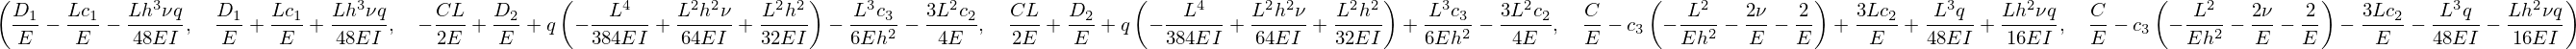

In [ ]:
# %% Formulación de elementos finitos:

# Se definen los desplazamientos nodales ux_i, uy_i, psi_i para i = 1,2

ux_1, ux_2, uy_1, uy_2, phi_1, phi_2 = sp.symbols('ux_1, ux_2, uy_1, uy_2, phi_1, phi_2')

# Se plantean las ecuaciones de los desplazamientos en nodos 1 y 2...
# en términos de los DEC:

ux1 = ux.subs(x, -L/2)
ux2 = ux.subs(x,  L/2)

uy1 = uy.subs(x, -L/2)
uy2 = uy.subs(x,  L/2)

phi1 = -phi.subs(x, -L/2)
phi2 = -phi.subs(x,  L/2)

ux1, ux2, uy1, uy2, phi1, phi2

The six equations obtained in the previous step constitute a $6 \times 6$ system of equations, from which the values of the constants $c_1, c_2, c_3, C, D_1, D_2$ can be expressed in terms of the nodal displacements. This procedure is carried out in the following code and yields the following results:

$$c_1 = - \frac{E u_{x,1}}{2 L} + \frac{E u_{x,2}}{2 L} - \frac{h^{3} \nu q}{48 I}$$

$$c_2 = \frac{E \phi_{1}}{6 L} - \frac{E \phi_{2}}{6 L} - \frac{L^{2} q}{144 I} - \frac{h^{2} \nu q}{48 I}$$

$$c_3 = \frac{3 E h^{2} \left(L \phi_{1} + L \phi_{2} + 2 u_{y,1} - 2 u_{y,2}\right)}{4 L \left(L^{2} + 3 h^{2} \nu + 3 h^{2}\right)}$$

$$C = - \frac{E \left(L^{3} \phi_{1} + L^{3} \phi_{2} + 6 L^{2} u_{y,1} - 6 L^{2} u_{y,2} + 12 h^{2} \nu u_{y,1} - 12 h^{2} \nu u_{y,2} + 12 h^{2} u_{y,1} - 12 h^{2} u_{y,2}\right)}{4 L \left(L^{2} + 3 h^{2} \nu + 3 h^{2}\right)}$$

$$D_1 = \frac{E \left(u_{x,1} + u_{x,2}\right)}{2}$$

$$D_2 = \frac{E L \phi_{1}}{8} - \frac{E L \phi_{2}}{8} + \frac{E u_{y,1}}{2} + \frac{E u_{y,2}}{2} - \frac{L^{4} q}{384 I} - \frac{L^{2} h^{2} \nu q}{32 I} - \frac{L^{2} h^{2} q}{32 I}$$


In [ ]:
# %% Se define una constante Phi que servirá más adelante:
# Phi = 3*h^2(1+nu)/L^2

Phi = sp.Symbol('Phi')  # No confundir con 'phi' minúscula, el giro de la sec.


# %% De las eqns anteriores se hallan las constantes c1, c2,c3, C, D1 y D2
eqns = (ux_1 - ux1, ux_2 - ux2, uy_1 - uy1, uy_2 - uy2,
        phi_1 - phi1, phi_2 - phi2)

sol = sp.solve(eqns, (c1, c2, c3, C, D1, D2))

for key in sol:
    print(f'{key} =')
    sp.pprint(sol[key].simplify())
    print(80*'~', '\n')

my_print('', '')

# %% Reemplazando la constante Phi en c3, C y D2:

for key in (c3, C, D2):
    print(f'{key} =')
    sp.pprint(sol[key].subs(nu, (L/h)**2*Phi/3 - 1).simplify())

my_print('', '')

c1 =
                         3    
24⋅E⋅I⋅(-ux₁ + ux₂) - L⋅h ⋅ν⋅q
──────────────────────────────
            48⋅I⋅L            
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 

c2 =
                       ⎛ 2      2  ⎞
24⋅E⋅I⋅(φ₁ - φ₂) - L⋅q⋅⎝L  + 3⋅h ⋅ν⎠
────────────────────────────────────
              144⋅I⋅L               
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 

c3 =
     2                              
3⋅E⋅h ⋅(L⋅φ₁ + L⋅φ₂ + 2⋅uy₁ - 2⋅uy₂)
────────────────────────────────────
          ⎛ 2      2        2⎞      
      4⋅L⋅⎝L  + 3⋅h ⋅ν + 3⋅h ⎠      
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 

C =
   ⎛ 3       3         2          2           2             2             2   
-E⋅⎝L ⋅φ₁ + L ⋅φ₂ + 6⋅L ⋅uy₁ - 6⋅L ⋅uy₂ + 12⋅h ⋅ν⋅uy₁ - 12⋅h ⋅ν⋅uy₂ + 12⋅h ⋅uy
──────────────────────────────────────────────────────────────────────────────
                                      

Now, having determined the six required constants, the six nodal equilibrium forces $N_i, M_i, Q_i$ for $i=1,2$ can be formulated and computed. This is done by substituting the constants $c_1, c_2, c_3, C, D_1, D_2$ obtained in the previous step and applying the sign convention for these forces according to the diagram presented. The following code performs this calculation, and after running it, the resulting expressions are:

$$N_1 = -N(-L/2) = - 2 A \left(- \frac{E ux_{1}}{2 L} + \frac{E ux_{2}}{2 L} - \frac{h^{3} \nu q}{48 I}\right)$$

$$N_1 = N(L/2) = 2 A \left(- \frac{E ux_{1}}{2 L} + \frac{E ux_{2}}{2 L} - \frac{h^{3} \nu q}{48 I}\right)$$

$$M_1 = M(-L/2) = \frac{3 E I \left(L \phi_{1} + L \phi_{2} + 2 uy_{1} - 2 uy_{2}\right)}{L^{2} + 3 h^{2} \nu + 3 h^{2}} + 6 I \left(\frac{E \phi_{1}}{6 L} - \frac{E \phi_{2}}{6 L} - \frac{L^{2} q}{144 I} - \frac{h^{2} \nu q}{48 I}\right) + \frac{L^{2} q}{8} - \frac{h^{2} q}{20}$$

$$M_2 = -M(L/2) = \frac{3 E I \left(L \phi_{1} + L \phi_{2} + 2 uy_{1} - 2 uy_{2}\right)}{L^{2} + 3 h^{2} \nu + 3 h^{2}} - 6 I \left(\frac{E \phi_{1}}{6 L} - \frac{E \phi_{2}}{6 L} - \frac{L^{2} q}{144 I} - \frac{h^{2} \nu q}{48 I}\right) - \frac{L^{2} q}{8} + \frac{h^{2} q}{20}$$

$$Q_1 = -Q(-L/2) =\frac{6 E I \left(L \phi_{1} + L \phi_{2} + 2 uy_{1} - 2 uy_{2}\right)}{L \left(L^{2} + 3 h^{2} \nu + 3 h^{2}\right)} + \frac{L q}{2}$$

$$Q_2 = Q(L/2) = - \frac{6 E I \left(L \phi_{1} + L \phi_{2} + 2 uy_{1} - 2 uy_{2}\right)}{L \left(L^{2} + 3 h^{2} \nu + 3 h^{2}\right)} + \frac{L q}{2}$$


In [ ]:
# %% Ahora se obtienen las expresiones para la Normal, Momento y Cortante:

N_1 = -N_x.subs(x, -L/2).subs([(c1, sol[c1]), (c2, sol[c2]), (c3, sol[c3])])
N_2 =  N_x.subs(x,  L/2).subs([(c1, sol[c1]), (c2, sol[c2]), (c3, sol[c3])])

M_1 =  M_x.subs(x, -L/2).subs([(c1, sol[c1]), (c2, sol[c2]), (c3, sol[c3])])
M_2 = -M_x.subs(x,  L/2).subs([(c1, sol[c1]), (c2, sol[c2]), (c3, sol[c3])])

Q_1 = -Q_x.subs(x, -L/2).subs([(c1, sol[c1]), (c2, sol[c2]), (c3, sol[c3])])
Q_2 =  Q_x.subs(x,  L/2).subs([(c1, sol[c1]), (c2, sol[c2]), (c3, sol[c3])])

# Se sustituye el área en las ecuaciones de fuerza axial:

N_1 = N_1.subs(t, A/h)
N_2 = N_2.subs(t, A/h)

# Se sustituye la inercia en las ecuaciones de momento y cortante:
M_1 = M_1.subs(t, 12*I/h**3)
M_2 = M_2.subs(t, 12*I/h**3)
Q_1 = Q_1.subs(t, 12*I/h**3)
Q_2 = Q_2.subs(t, 12*I/h**3)

Finally, the standard matrix formulation of the finite element method can be obtained by writing the above system of equations in matrix form. This will be done by treating separately the equations of the rod element and those of the beam element, so that the following two matrix systems are obtained:

$$\mathbf{K_r a_r + f_r = q_r}$$
$$\mathbf{K_b a_b + f_b = q_b}$$

It should be noted that in the article these systems are presented using a slightly different notation; however, the formulation yields the same stiffness matrices $\mathbf{K}$ and the same equivalent force vectors $\mathbf{f}$, as will be shown below.

#### Matrix formulation of the rod finite element:

By means of the code shown below, the stiffness matrix $\mathbf{K_r}$ of the rod element is obtained. This is derived by taking equations 1 and 2 of the previous $6 \times 6$ system and collecting the terms that multiply the nodal displacements in the respective order. On the other hand, the equivalent force vector $\mathbf{q}$ is obtained in the same way, by taking in each equation the term that does not multiply any nodal displacement. After running the code, the system $\mathbf{K_r a_r + f_r = q_r}$ is obtained, where:

$$\mathbf{q_r} = [ N_1, N_2 ]^T$$

$$\mathbf{a_r} = [ u_{x,1}, u_{x,2} ]^T$$

$$\mathbf{K_r} = \frac{A E}{L} \left[\begin{matrix}1 & -1\\-1 & 1\end{matrix}\right]$$

$$\mathbf{f_r} = \frac{h \nu q}{2} \left[\begin{matrix}1\\-1\end{matrix}\right]$$


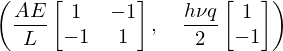

In [ ]:
# %% Se deduce la matriz de rigidez Kr y el vector fr para el elemento barra:

Kr = sp.zeros(2)
fr = sp.zeros(2,1)

i = 0  # identificador para filas

for eqn in (N_1, N_2):

    coef_K = sp.poly(eqn, (ux_1, ux_2)).coeffs()[:2]
    coef_f = sp.poly(eqn, (ux_1, ux_2)).coeffs()[-1]
    for j in range(2):  # j = identificador para columnas
        Kr[i, j] = coef_K[j].simplify()
    fr[i] = coef_f.subs([(A, t*h), (I, t*h**3/12)]).simplify()
    i += 1


fc = E*A/L  # Se define el factor común de Kr (según eq. 41 del artículo)

# Se expresa K como el producto del factor común por la matriz factorizada:
K_r = sp.MatMul(fc, Kr/fc)

fcf = q*nu*h/2  # Se define el factor común de fr (según eq. 41 del artículo)

f_r = sp.MatMul(fcf, fr/fcf)

K_r, f_r

#### Matrix formulation of the beam finite element:

The derivation of the stiffness matrix and the equivalent nodal force vector for the beam element is carried out in exactly the same way as for the rod element, except that this time equations 3 through 6 of the previous $6 \times 6$ system are used. The following code derives the matrix system $\mathbf{K_b a_b + f_b = q_b}$, where:

$$\mathbf{q_b} = [ Q_1, M_1, Q_2, M_2 ]^T$$

$$\mathbf{a_b} = [ u_{y,1}, \phi_1, u_{y,2}, \phi_2 ]^T$$

$$\mathbf{K_b} = \frac{E I}{L^{3} \left(\Phi + 1\right)} \left[\begin{matrix}12 & 6 L & -12 & 6 L\\6 L & L^{2} \left(\Phi + 4\right) & - 6 L & L^{2} \left(- \Phi + 2\right)\\-12 & - 6 L & 12 & - 6 L\\6 L & L^{2} \left(- \Phi + 2\right) & - 6 L & L^{2} \left(\Phi + 4\right)\end{matrix}\right]$$

$$\mathbf{f_b} = \frac{q}{2} \left[\begin{matrix}L\\\frac{L^{2}}{6} - \frac{h^{2} \nu}{4} - \frac{h^{2}}{10}\\L\\- \frac{L^{2}}{6} + \frac{h^{2} \nu}{4} + \frac{h^{2}}{10}\end{matrix}\right]$$

In the above equations, a constant $\Phi = \frac{3h^2(1+\nu)}{L^2}$ is introduced to simplify the representation.


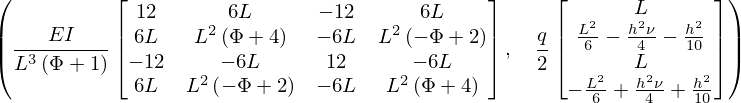

In [ ]:
# %% Se deduce la matriz de rigidez Kb y el vector de fuerzas fb
# para el elemento viga:

Kb = sp.zeros(4)
fb = sp.zeros(4,1)

i = 0  # identificador para filas

for eqn in (Q_1, M_1, Q_2, M_2):

    eqn = eqn.subs(nu, (L/h)**2*Phi/3 - 1) # Se reemplaza la constante Phi
    coef_K = sp.poly(eqn, (uy_1, phi_1, uy_2, phi_2)).coeffs()[:4]
    coef_f = sp.poly(eqn, (uy_1, phi_1, uy_2, phi_2)).coeffs()[-1]
    for j in range(4):  # j = identificador para columnas
        Kb[i, j] = coef_K[j].simplify()
    fb[i] = coef_f.subs(Phi, 3*h**2*(1+nu)/L**2).simplify()

    i += 1

fc = E*I/((1+Phi)*L**3)  # factor común de K (según eq. 42 del artículo)

# Se expresa K como el producto del factor común por la matriz factorizada:
K_b = sp.MatMul(fc, Kb/fc)

# Mismo proceso para fb:

fcf = q/2  # factor común de f (según eq. 42 del artículo)

f_b = sp.MatMul(fcf, fb/fcf)

K_b, f_b

### Generalization of the 2D displacement field from the nodal displacements

By determining the six nodal displacements through the previous matrix systems, the 2D displacement field can be computed for any point $(x,y)$ within the finite element. The relationship between the nodal displacement vector and the 2D displacement field can be obtained by executing the following code, which yields:

$$Ux(x,y) = \mathbf{N_x u} + qL_1$$
 
$$Uy(x,y) = \mathbf{N_y u} + qL_2$$

Where:

$$u = [u_{x,1}, u_{y,1}, \phi_1, u_{x,2}, u_{y,2}, \phi_2]^T$$

$$\mathbf{N_x^T} = \left[\begin{matrix}\frac{\frac{L}{2} - x}{L}\\\frac{y \left(3 L^{2} + 4 \nu y^{2} - 12 x^{2} + 8 y^{2}\right)}{2 L^{3} \left(9 \Phi + 1\right)}\\\frac{y \left(- 18 L^{2} \Phi + L^{2} + 36 L \Phi x + 4 L x + 4 \nu y^{2} - 12 x^{2} + 8 y^{2}\right)}{4 L^{2} \left(9 \Phi + 1\right)}\\\frac{\frac{L}{2} + x}{L}\\\frac{y \left(- 3 L^{2} - 4 \nu y^{2} + 12 x^{2} - 8 y^{2}\right)}{2 L^{3} \left(9 \Phi + 1\right)}\\- \frac{y \left(18 L^{2} \Phi - L^{2} + 36 L \Phi x + 4 L x - 4 \nu y^{2} + 12 x^{2} - 8 y^{2}\right)}{4 L^{2} \left(9 \Phi + 1\right)}\end{matrix}\right]$$

$$\mathbf{N_y^T} = \left[\begin{matrix}\frac{\nu y}{L}\\\frac{9 L^{3} \Phi + L^{3} - 18 L^{2} \Phi x - 3 L^{2} x + 12 \nu x y^{2} + 4 x^{3}}{2 L^{3} \left(9 \Phi + 1\right)}\\\frac{9 L^{3} \Phi + L^{3} - 2 L^{2} x - 36 L \Phi \nu y^{2} - 36 L \Phi x^{2} - 4 L \nu y^{2} - 4 L x^{2} + 24 \nu x y^{2} + 8 x^{3}}{8 L^{2} \left(9 \Phi + 1\right)}\\- \frac{\nu y}{L}\\\frac{9 L^{3} \Phi + L^{3} + 18 L^{2} \Phi x + 3 L^{2} x - 12 \nu x y^{2} - 4 x^{3}}{2 L^{3} \left(9 \Phi + 1\right)}\\\frac{- 9 L^{3} \Phi - L^{3} - 2 L^{2} x + 36 L \Phi \nu y^{2} + 36 L \Phi x^{2} + 4 L \nu y^{2} + 4 L x^{2} + 24 \nu x y^{2} + 8 x^{3}}{8 L^{2} \left(9 \Phi + 1\right)}\end{matrix}\right]$$

$$L_1 = \frac{x y \left(- L^{2} - 4 \nu y^{2} + 4 x^{2} - 8 y^{2}\right)}{24 E I}$$

$$L_2 = \frac{- L^{4} - 12 L^{2} h^{2} \nu - 12 L^{2} h^{2} + 8 L^{2} \nu y^{2} + 8 L^{2} x^{2} + 16 h^{3} \nu^{2} y - 16 h^{3} y + 24 h^{2} \nu^{2} y^{2} + 48 h^{2} \nu x^{2} + 48 h^{2} x^{2} - 24 h^{2} y^{2} - 96 \nu x^{2} y^{2} + 32 \nu y^{4} - 16 x^{4} + 16 y^{4}}{384 E I}$$


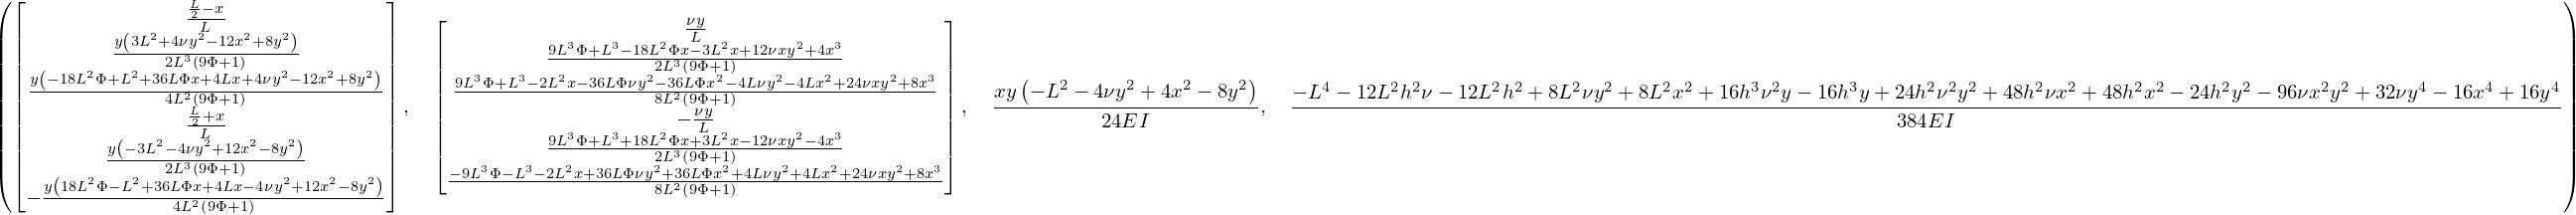

In [ ]:
# %% Por último, se pueden reemplazar las constantes c1, c2, c3, C, D1, D2
# en las ecuaciones de Ux y Uy, para obtenerlas en función de los DEC:

Uxx = Ux.subs([(c1, sol[c1]), (c2, sol[c2]), (c3, sol[c3]),
               (C, sol[C]), (D1, sol[D1]), (D2, sol[D2])]).subs(t, 12*I/h**3).expand()
Uyy = Uy.subs([(c1, sol[c1]), (c2, sol[c2]), (c3, sol[c3]),
               (C, sol[C]), (D1, sol[D1]), (D2, sol[D2])]).subs(t, 12*I/h**3).expand()


# Para expresar estos desplazamientos en forma matricial, es decir:
# Ux = Nx*u + q*L1 y Uy = Ny*u + q*L1
# se deducen las matrices Nx y Ny

Nx = sp.zeros(1, 6)
Ny = sp.zeros(1, 6)

coef_Ux = sp.poly(Uxx, (ux_1, uy_1, phi_1, ux_2, uy_2, phi_2)).coeffs()
coef_Uy = sp.poly(Uyy, (ux_1, uy_1, phi_1, ux_2, uy_2, phi_2)).coeffs()

for i in range(6):
    Nx[i] = coef_Ux[i].subs(h, sp.sqrt(3*Phi*L**2/(nu+1))).simplify()
    Ny[i] = coef_Uy[i].subs(h, sp.sqrt(3*Phi*L**2/(nu+1))).simplify()

L1 = (coef_Ux[-1]/q).simplify()
L2 = (coef_Uy[-1]/q).simplify()

Nx.T, Ny.T, L1, L2

## Implementation of the proposed finite element

The following section briefly explains the process of implementing the finite element in a Python program to solve a beam using the theory presented in the article.

### Additional derivations beyond the article

The article concludes by presenting the equations for the calculation of the 2D displacement field discussed earlier. However, for the purpose of implementing it in this work and making comparisons with other theories and methods for solving beams, it is necessary to introduce a methodology that allows the calculation of bending moments and shear forces along the beam. This methodology is presented below. It should be emphasized that the finite element approach does not primarily focus on computing these forces, since it ultimately treats the beam as a 2D solid under plane stress.

#### Calculation of moment and shear:

The calculation of the bending moment and shear force from the nodal displacements can be summarized as follows: the six constants $c_1, c_2, c_3, C, D_1, D_2$, expressed in terms of the nodal displacements, are substituted into the initial expressions for $M(x)$ and $Q(x)$. Thus, the bending moments and shear forces in the finite element can be expressed as:

$M = \mathbf{B_b a_b}$, where:
- $B_b = \frac{Ee Ie}{Le^{2} + 3 h^{2} \nu + 3 h^{2}} \left[\begin{matrix}-6 & - \frac{4 Le^{2} + 3 h^{2} \nu + 3 h^{2}}{Le} & 6 & \frac{- 2 Le^{2} + 3 h^{2} \nu + 3 h^{2}}{Le}\\6 & \frac{2 Le^{2} - 3 h^{2} \nu - 3 h^{2}}{Le} & -6 & \frac{4 Le^{2} + 3 h^{2} \nu + 3 h^{2}}{Le}\end{matrix}\right]$

- $\mathbf{a_b} = [u_{y,1}, \phi_1, u_{y,2}, \phi_2]^T$

$Q = \mathbf{B_s a_b}$, where:
- $B_s = \frac{Ee Ie}{Le^{2} + 3 h^{2} \nu + 3 h^{2}} \left[\begin{matrix}\frac{12}{Le} & 6 & - \frac{12}{Le} & 6\end{matrix}\right]$

From the above expressions it can be observed that the bending moment varies linearly within the finite element, and therefore it can be evaluated at two points, whereas the shear force remains constant. Applying these formulas makes it possible to compute bending moments and shear forces in the implementation.



In [ ]:
# %% Cálculo de momentos, cortantes y axiales:

Ee, Ae, Le, qe, Ie = sp.symbols('Ee, Ae, Le, qe, Ie')

MM = M_x.subs([(c1, sol[c1]), (c2, sol[c2]), (c3, sol[c3])]).subs(t, 12*I/h**3).expand()
QQ = Q_x.subs([(c1, sol[c1]), (c2, sol[c2]), (c3, sol[c3])]).subs(t, 12*I/h**3).expand()
NN = N_x.subs(c1, sol[c1]).subs(t, A/h)

M1 = -MM.subs(x, -L/2)
M2 = -MM.subs(x, L/2)

Q0 = -QQ.subs(x, 0)

coef_N =  sp.poly(NN, (ux_1, ux_2)).coeffs()
coef_M1 = sp.poly(M1, (uy_1, phi_1, uy_2, phi_2)).coeffs()
coef_M2 = sp.poly(M2, (uy_1, phi_1, uy_2, phi_2)).coeffs()

coef_Q0 = sp.poly(Q0, (uy_1, phi_1, uy_2, phi_2)).coeffs()


# %% Matriz Bn para obtener la fuerza axial
B_n = sp.zeros(1, 2)

for j in range(2):
    B_n[j] = coef_N[j].simplify().subs([(E, Ee), (L, Le), (q, qe), (A, Ae), (I, Ie)])

p_n = coef_N[-1].subs([(E, Ee), (L, Le), (q, qe), (A, Ae), (I, Ie)])

fcn = Ae*Ee/Le
B_n = sp.MatMul(fcn, B_n/fcn)

# %% Se deduce la matriz Bb para obtener los momentos
B_b = sp.zeros(2, 4)

for j in range(4):
    B_b[0, j] = coef_M1[j].simplify().subs([(E, Ee), (L, Le), (q, qe), (A, Ae), (I, Ie)])
    B_b[1, j] = coef_M2[j].simplify().subs([(E, Ee), (L, Le), (q, qe), (A, Ae), (I, Ie)])

fc_Bb = Ee*Ie/(Le**2+3*h**2*nu+3*h**2)  # Factor común de la matriz Bb
B_b = sp.MatMul(fc_Bb, B_b/fc_Bb)

my_print(B_b, 'Bb')
my_print('', '')


# %% Se deduce la matriz Bs para obtener las cortantes

B_s = sp.zeros(1, 4)

for j in range(4):
    B_s[j] = coef_Q0[j].simplify().subs([(E, Ee), (L, Le), (q, qe), (A, Ae), (I, Ie)])

fc_Bs = fc_Bb  # Factor común de la matriz Bs
B_s = sp.MatMul(fc_Bs, B_s/fc_Bs)

my_print(B_s, 'Bs')
my_print('', '')


 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Bb =

                    ⎡     ⎛    2      2        2⎞             2      2        
                    ⎢    -⎝4⋅Le  + 3⋅h ⋅ν + 3⋅h ⎠       - 2⋅Le  + 3⋅h ⋅ν + 3⋅h
                    ⎢-6  ─────────────────────────  6   ──────────────────────
       Ee⋅Ie        ⎢                Le                            Le         
───────────────────⋅⎢                                                         
  2      2        2 ⎢          2      2        2             2      2        2
Le  + 3⋅h ⋅ν + 3⋅h  ⎢      2⋅Le  - 3⋅h ⋅ν - 3⋅h          4⋅Le  + 3⋅h ⋅ν + 3⋅h 
                    ⎢6     ─────────────────────    -6   ─────────────────────
                    ⎣                Le                            Le         

2⎤
 ⎥
─⎥
 ⎥
 ⎥
 ⎥
 ⎥
 ⎥
 ⎦

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Bs =

#### Calculation of the stresses $\sigma_x$ in the beam

As was done for the 2D displacements, the stress field in the beam can be obtained from the nodal displacements. In this work, for brevity, only the stresses $\sigma_x$ will be computed for comparison purposes. These stresses can be calculated as follows:

$\sigma_x(x,y) = \mathbf{B_\sigma u} + qL_\sigma$, where:

- $\mathbf{B_\sigma} = \frac{E}{L} \left[\begin{matrix}-1 & - \frac{12 x y}{L^{2} \left(9 \Phi + 1\right)} & \frac{y \left(9 L \Phi + L - 6 x\right)}{L \left(9 \Phi + 1\right)} & 1 & \frac{12 x y}{L^{2} \left(9 \Phi + 1\right)} & - \frac{y \left(9 L \Phi + L + 6 x\right)}{L \left(9 \Phi + 1\right)}\end{matrix}\right]$

- $\mathbf{u} = [u_{x,1}, u_{y,1}, \phi_1, u_{x,2}, u_{y,2}, \phi_2]^T$

- $L_\sigma = \frac{- L^{2} y - h^{3} \nu - 3 h^{2} \nu y + 12 x^{2} y - 8 y^{3}}{24 I}$


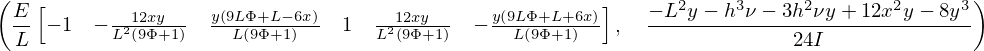

In [ ]:
# %% Matriz para hallar el campo de esfuerzos sx:

Sxx = sx.subs([(c1, sol[c1]), (c2, sol[c2]), (c3, sol[c3]),
               (C, sol[C]), (D1, sol[D1]), (D2, sol[D2])]).expand()

B_sig = sp.zeros(1, 6)

coef_sig = sp.poly(Sxx, (ux_1, uy_1, phi_1, ux_2, uy_2, phi_2)).coeffs()
for i in range(6):
    B_sig[i] = coef_sig[i].subs(h, sp.sqrt(3*Phi*L**2/(nu+1))).simplify()

L_sig = (coef_sig[-1]/q).simplify()

fc = E/L

B_sig = sp.MatMul(fc, B_sig/fc)

B_sig, L_sig

### Results report

#### Brief explanation of the results to be presented

A Python program was developed to solve a beam using the finite element proposed in this work. In addition, the same beam was solved using Euler–Bernoulli and Timoshenko finite elements. Moreover, the beam was also analyzed with 2D finite elements as a solid under plane stress, in order to obtain the most realistic data on the beam’s behavior and thus have a theoretical reference value against which to compare the other methods.

The beam proposed for the implementation was the following:

<img src="https://github.com/alejohg/Kartunnen-Hertzen-FE/blob/master/Viga.png?raw=1" width=500>

This beam was analyzed for three different heights: 40 cm, 70 cm, and 120 cm, corresponding to $\frac{h}{L}$ ratios of 0.08, 0.14, and 0.24, respectively.

For each of the three beams, the following comparisons were made:

- Displacements $w(x)$ among EB, Timoshenko, the FE proposed in the paper, and the 2D plane-stress FE. The percentage error was computed at midspan (x = 2.5).
- Rotation $\theta(x)$, bending moment, and shear force among EB, Timoshenko, and the FE proposed in the paper.
- Displacements $U_x(x,y)$ and $U_y(x,y)$ obtained with the FE proposed in the paper and with the 2D plane-stress FEM. The percentage error was computed at three points.
- Displacements $U_x$ and stresses $\sigma_x$ in the cross-section at x = 2.5 m.


### Results for the beam with h/L = 0.08

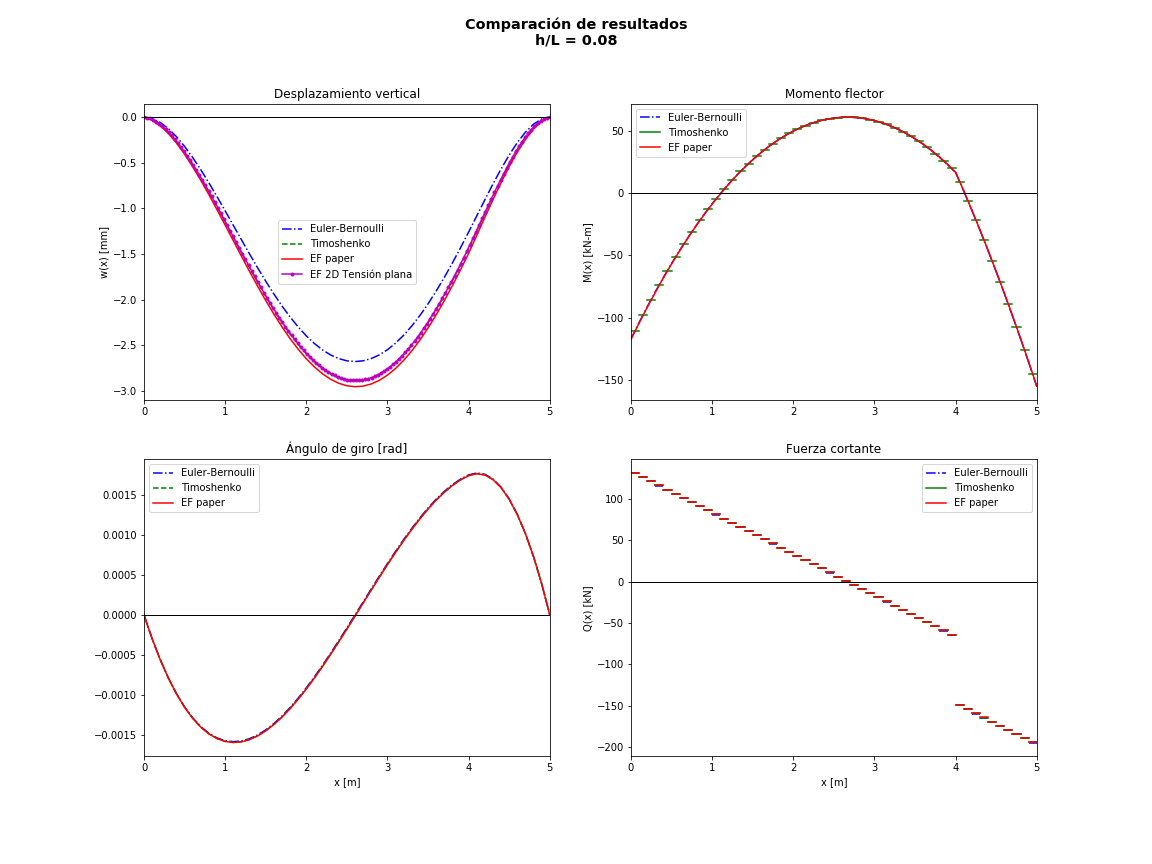

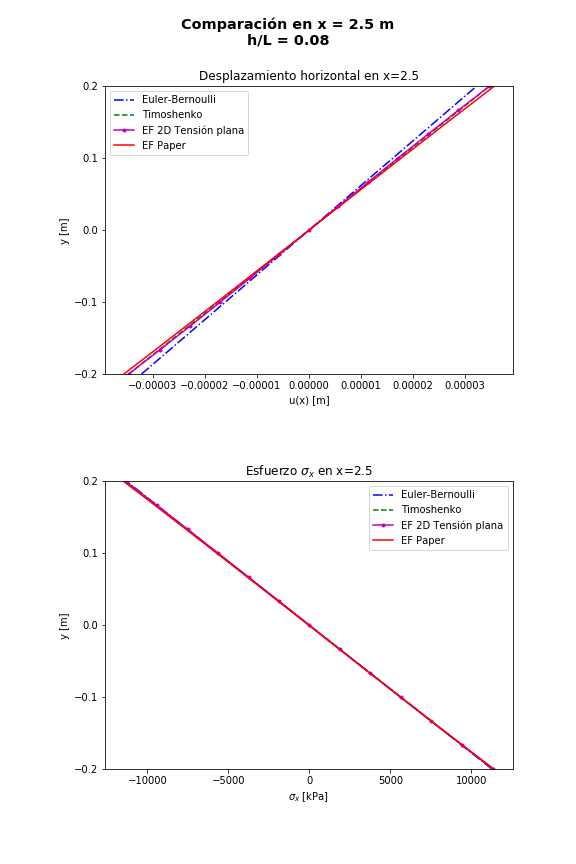

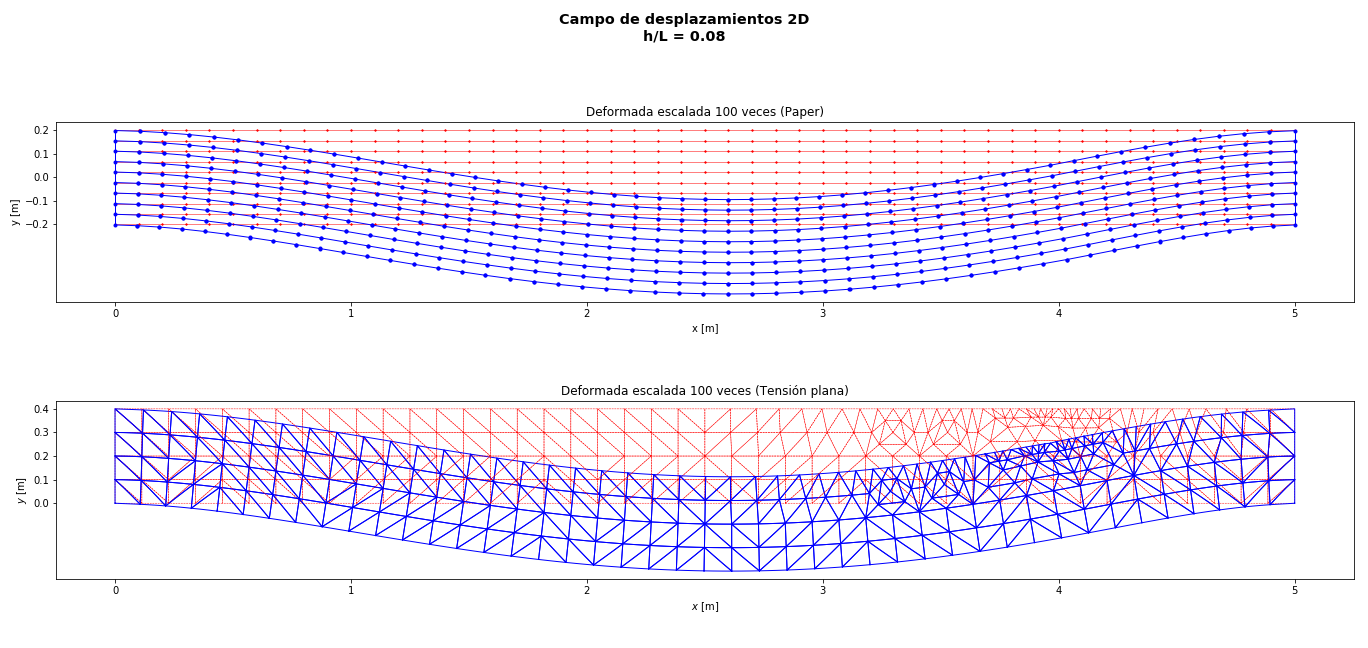

In [ ]:
from IPython.display import Image, display

files = 'w_t seccion 2D'.split()
images_list = [f'./Viga_0.08/Comparacion/{file}.png' for file in files]

for imageName in images_list:
    display(Image(filename=imageName))

#### Error percentages

The following tables report the error percentages of the nodal displacements and of the 2D displacements at selected points, taking as the theoretical value that obtained from the 2D plane-stress FE analysis. The 2D displacements for all beams were compared at three points, which are shown below:

- Point 1: (2.5, h)  
- Point 2: (2.5, 0)  
- Point 3: (4, h)  

<img src="https://github.com/alejohg/Kartunnen-Hertzen-FE/blob/master/puntos.png?raw=1" width=800>


#### Nodal displacement $u_y$ (Plane-stress neutral axis vs. Paper vs. Timoshenko)

In [ ]:
desp_1 = pd.read_csv('./Viga_0.08/Comparacion/error_desp.csv')
desp_1

,x,uy (Tensión plana) [mm],uy (Paper) [mm],uy (Timoshenko) [mm],Error Paper [%],Error Timoshenko [%]
0,2.5,-2.876635,-2.944247,-2.885196,2.350361,0.297608


#### Vertical displacement $U_y$ (Plane-stress vs. Paper)

In [ ]:
desp2d_1 = pd.read_csv('./Viga_0.08/Comparacion/error_2d.csv')
desp2d_1

,Punto,Uy (Tensión plana) [mm],Uy (Paper) [mm],Error Uy paper [%]
0,1,-2.935542,-2.868042,2.299411
1,2,-2.934242,-2.866781,2.299106
2,3,-1.492257,-1.459002,2.228468


#### Interpretation of results for Beam 1:

In this first analysis, a trend can be observed that will persist in the subsequent cases: while Euler–Bernoulli theory underestimates the beam deflections (which is not surprising given the limitations of the theory), the formulation implemented from the paper tends to overestimate these displacements, showing a clear deviation from the theoretical values obtained by analyzing the beam with the 2D plane-stress FE model. Regarding displacements, it is evident that Timoshenko’s theory produced the most accurate results. On the other hand, for rotation, bending moment, and shear force, the plots overlap, meaning that the implementation adopted to compute moments from the paper’s theory provided quite positive results, confirming its theoretical and mathematical validity.

As for the results of the displacement $U_x$ and the stress $\sigma_x$ at the section $x=2.5$, it can be seen that Euler–Bernoulli shows a clear deviation in the calculation of sectional displacements, once again evidencing the limitations of this theory. By contrast, both Timoshenko’s results and those from the paper show acceptable accuracy, although the displacements from the paper present slight deviations compared with the theoretical value, while Timoshenko’s results nearly coincide. Regarding the stresses in the section, all three theories predict them with considerable accuracy, as the three plots practically overlap with the theoretical curve.

In addition, the 2D deformed shape of the beam—obtained after computing and plotting the generalized 2D displacement field from the paper’s equations—proves to be visually appealing and yields results that, at least at first glance, resemble quite closely the 2D deformed shape of the plane-stress mesh. The resulting shape of the beam is consistent with the applied loads and boundary conditions. Finally, when contrasting the error percentages in the last table, it can be stated that the results exhibit acceptable accuracy, with errors below 3%.

### Results for beam with h/L = 0.14

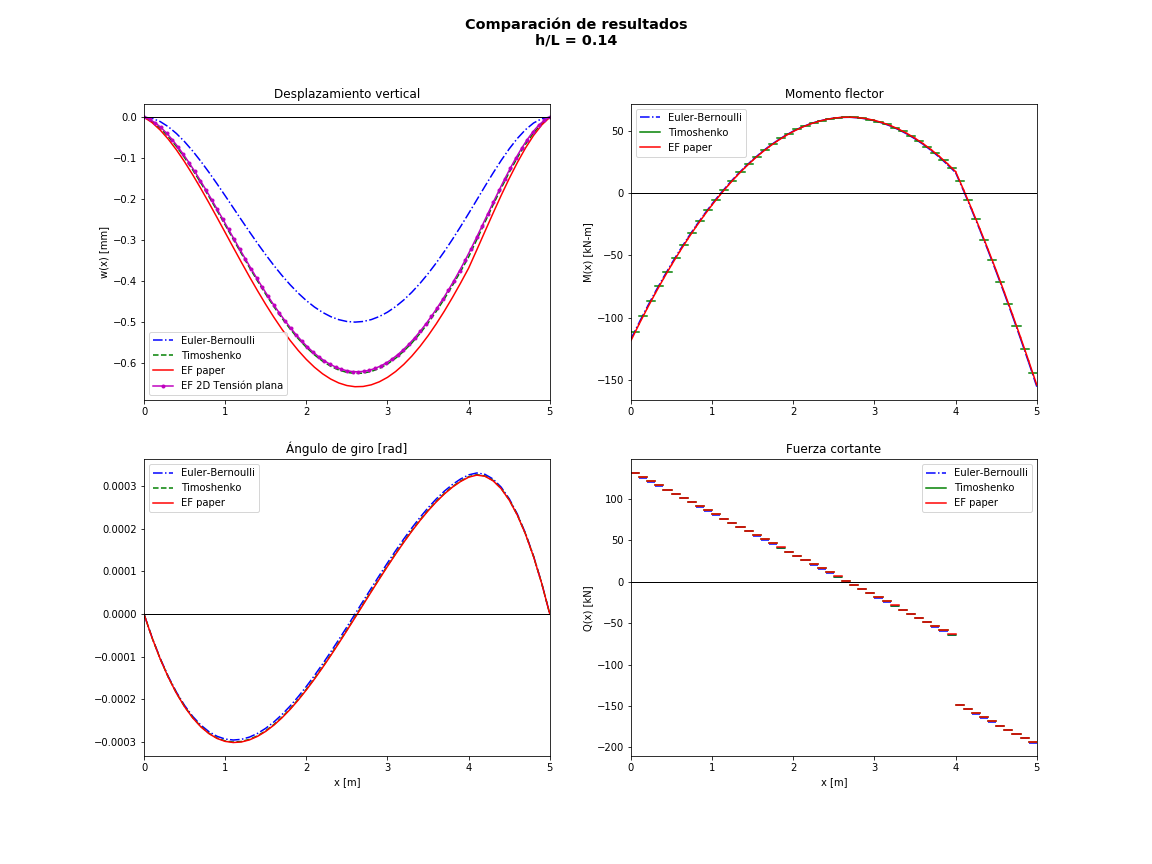

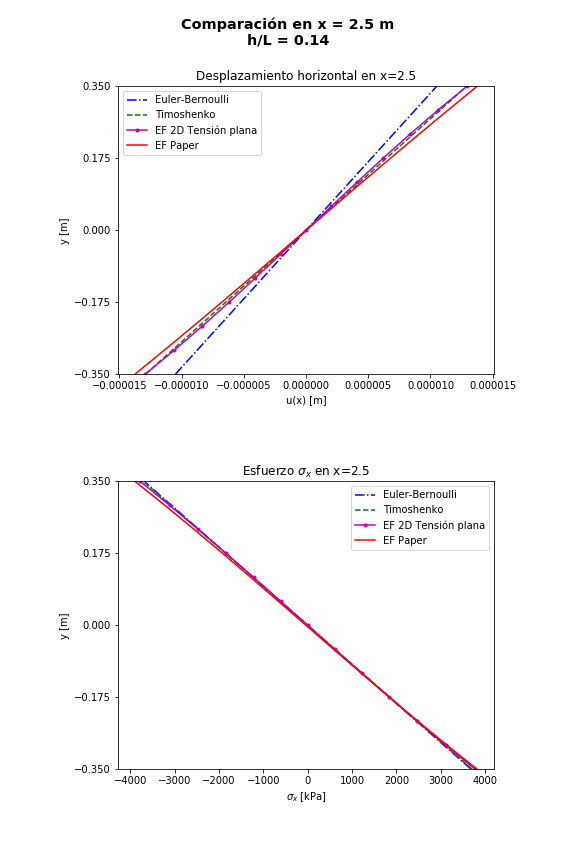

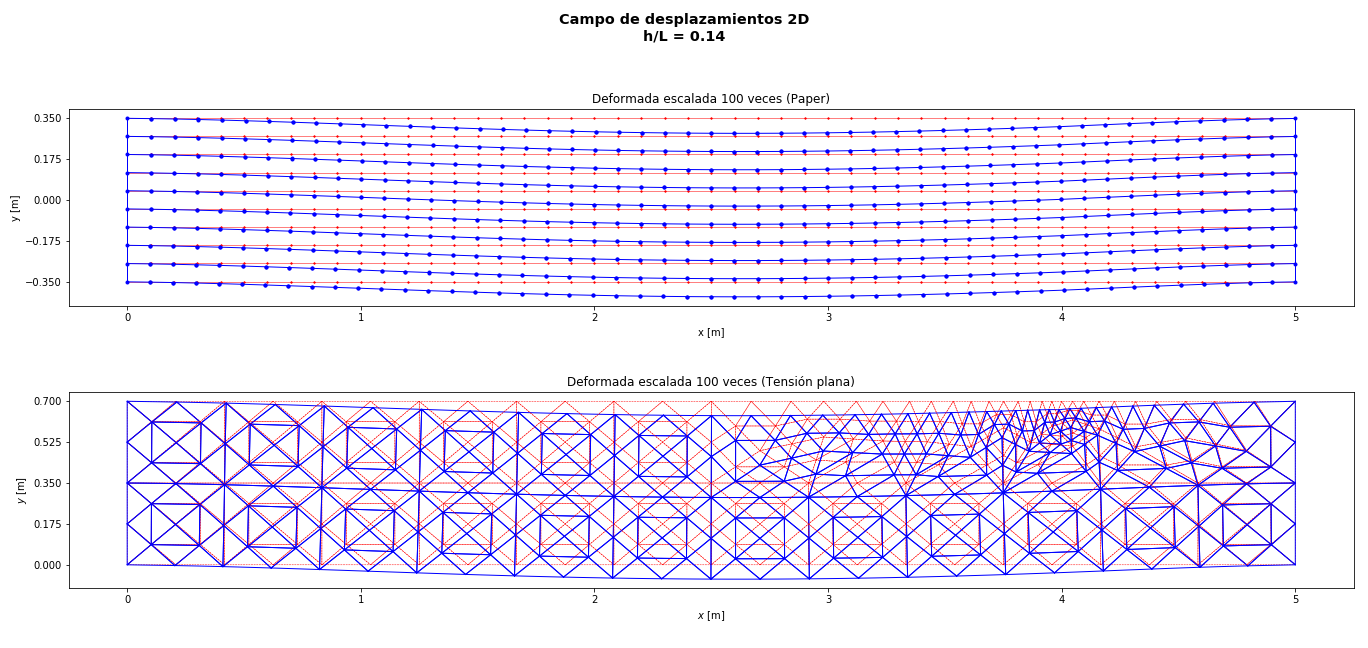

In [ ]:
files = 'w_t seccion 2D'.split()
images_list = [f'./Viga_0.14/Comparacion/{file}.png' for file in files]

for imageName in images_list:
    display(Image(filename=imageName))

### Error percentages:

#### Nodal displacement $u_y$ (Plane-stress neutral axis vs. Paper vs. Timoshenko)

In [ ]:
desp_2 = pd.read_csv('./Viga_0.14/Comparacion/error_desp.csv')
desp_2


,x,uy (Tensión plana) [mm],uy (Paper) [mm],uy (Timoshenko) [mm],Error Paper [%],Error Timoshenko [%]
0,2.5,-0.618426,-0.654559,-0.622502,5.842765,0.659094


#### Vertical displacement $U_y$ (Plane-stress vs. Paper)

In [ ]:
desp2d_2 = pd.read_csv('./Viga_0.14/Comparacion/error_2d.csv')
desp2d_2

,Punto,Uy (Tensión plana) [mm],Uy (Paper) [mm],Error Uy paper [%]
0,1,-0.650755,-0.614752,5.532431
1,2,-0.648482,-0.612541,5.542217
2,3,-0.369722,-0.368901,0.221975


### Analysis of results for Beam 2:

In the first diagram, the behavior is similar to that observed for the first beam, but with even more pronounced differences. In this case, the displacements from EB can be disregarded, as they are completely offset since the theory does not hold for this value of h/L. Once again, the FE formulation from the paper overestimates the beam deflections, resulting in Timoshenko’s theory producing the closest results to the theoretical ones. The rotations, bending moments, and shear forces are practically identical, although, as expected, the EB rotations are slightly offset because shear deformation of the section is not considered.

In the $U_x(2.5, y)$ diagram, it can again be seen that EB is completely offset. Both Timoshenko and the FE formulation from the paper attempt to better match the theoretical curve, but the paper still shows a slightly larger deviation. Regarding the stresses $\sigma_x$, it can be observed that this time the theoretical values begin to exhibit a curved trajectory, whereas both Timoshenko and EB predict a linear stress distribution across the section. In this case, the only results that attempt to replicate this curved trajectory (somewhat resembling an inverted “S”) are those from the paper, although with a slight deviation at the top.

Finally, there is little to add regarding the 2D displacement diagram, as its purpose is to provide a purely visual comparison. As for the error percentages, concerning the deflection at $x=2.5$, Timoshenko clearly shows the highest accuracy, with less than 1% error compared to almost 6% for the paper. Lastly, examining the error table for the 2D displacements, it can be concluded that the errors remain acceptable (5.5% at most). Interestingly, at point 3 the error is less than 0.3%, meaning that while the other errors increased compared to the previous beam, the displacement at this point is almost identical to the theoretical value.

### Results for beam with h/L = 0.24

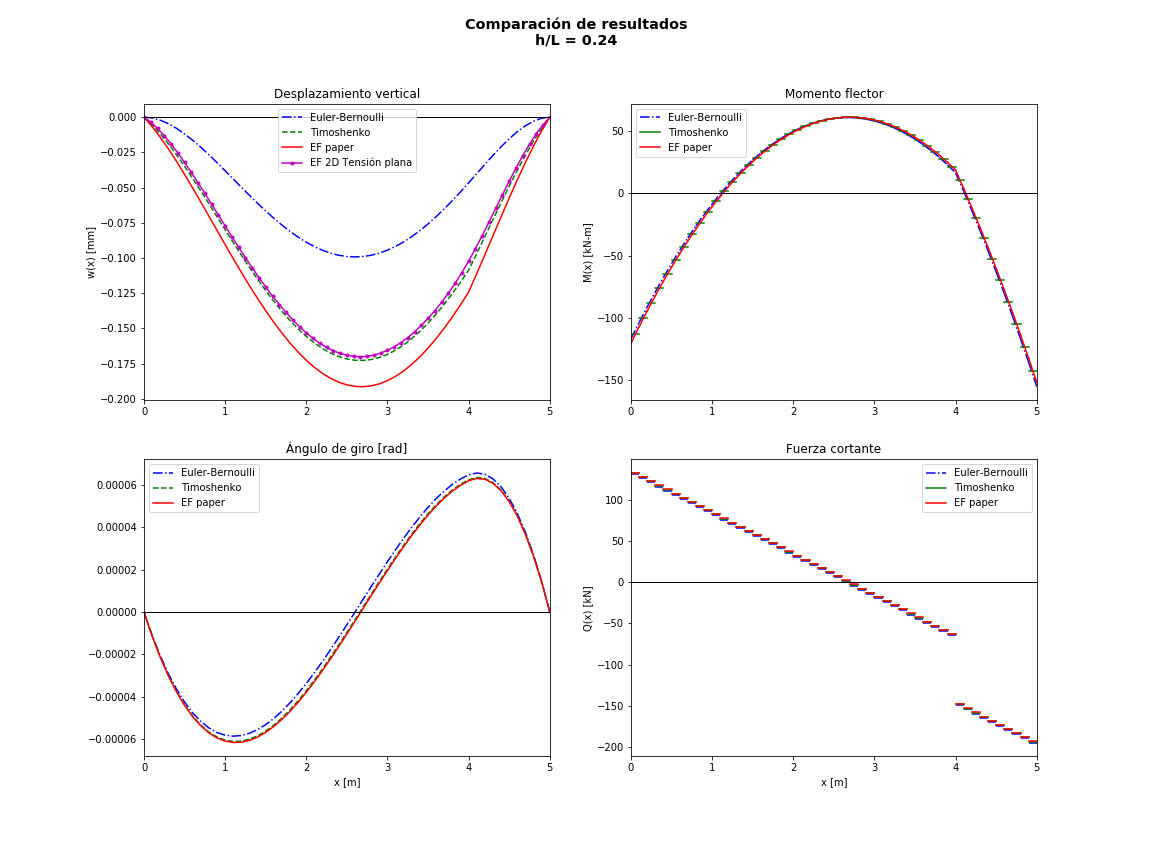

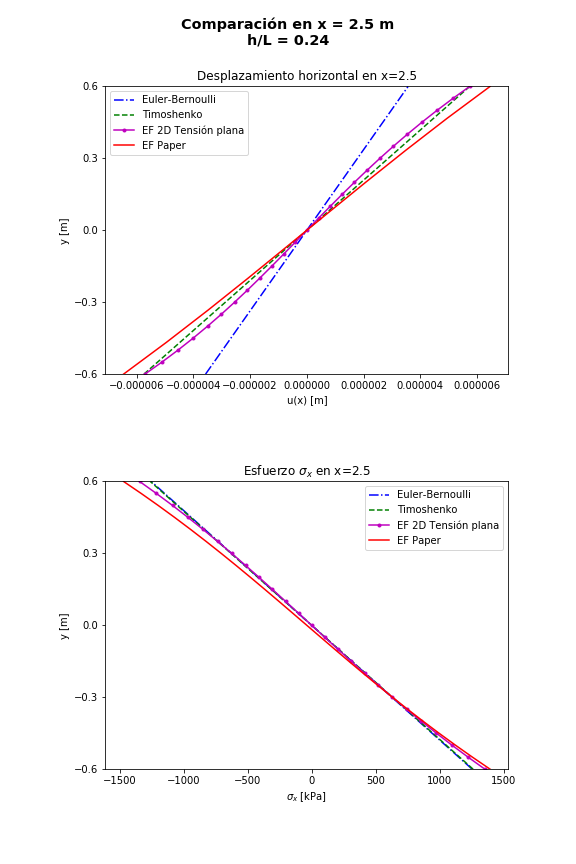

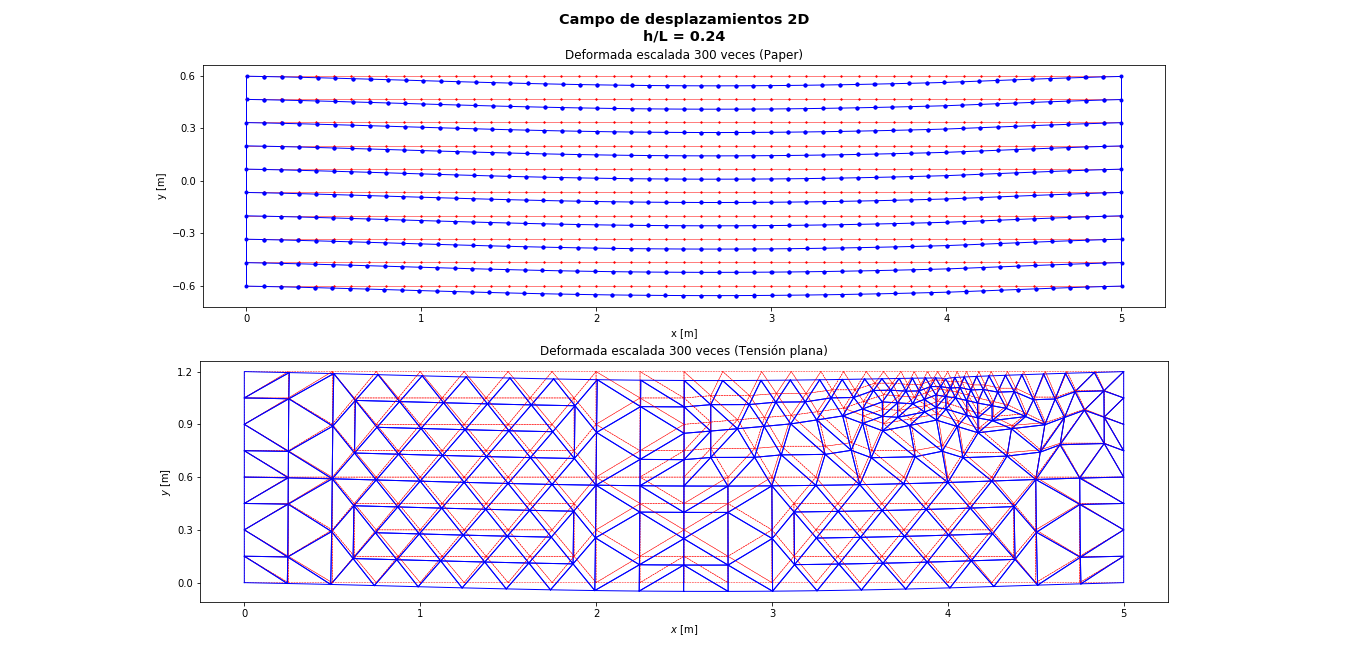

In [ ]:
files = 'w_t seccion 2D'.split()
images_list = [f'./Viga_0.24/Comparacion/{file}.png' for file in files]

for imageName in images_list:
    display(Image(filename=imageName))

### Error percentages:

#### Nodal displacement $u_y$ (Plane-stress neutral axis vs. Paper vs. Timoshenko)

In [ ]:
desp_3 = pd.read_csv('./Viga_0.24/Comparacion/error_desp.csv')
desp_3

,x,uy (Tensión plana) [mm],uy (Paper) [mm],uy (Timoshenko) [mm],Error Paper [%],Error Timoshenko [%]
0,2.5,-0.169029,-0.190038,-0.171653,12.429336,1.552237


#### Vertical displacement $U_y$ (Plane-stress vs. Paper)

In [ ]:
desp2d_3 = pd.read_csv('./Viga_0.24/Comparacion/error_2d.csv')
desp2d_3

,Punto,Uy (Tensión plana) [mm],Uy (Paper) [mm],Error Uy paper [%]
0,1,-0.189784,-0.168932,10.986901
1,2,-0.185889,-0.165194,11.132686
2,3,-0.127357,-0.143270,12.494659


### Analysis of results for Beam 3:

For this h/L ratio, a significant loss of accuracy in the classical beam theories is to be expected. Indeed, EB considerably mispredicts all results compared with the plane-stress theoretical values. Comparing the deflections in the first graph, it can be seen that the paper continues to overestimate these values, and once again Timoshenko’s theory shows the greatest accuracy. This is confirmed in the error percentage table of $u_y(0.5)$, where Timoshenko shows an error of 1.5%, while the paper exceeds 12%. The bending moments and shear forces remain very similar among the three theories, although in this case, the EB moments differ somewhat from those of the paper.

Regarding the horizontal displacements in the section, none of the theories compute them exactly, but once again Timoshenko provides the values closest to the theoretical curve. For the stresses, the same behavior observed in the Beam 2 graph appears, except that in this case the theoretical results accentuate this curved behavior even more—something that only the results from the paper can emulate, albeit with limitations: while the fit is fairly accurate at the bottom fiber, as the section approaches the top fiber, a continuous deviation from the theoretical curve becomes evident.

Finally, when comparing the error percentages for the displacements $U_y(x,y)$, it can be observed that the errors increased notably compared with the previous beam, showing values between 11% and 12.5%.

## Conclusions

- The finite element proposed in the article, while it can be regarded as a very interesting academic exercise and as a somewhat different way of applying knowledge of Solid Mechanics and Finite Elements in an uncommon formulation, does not exhibit the expected accuracy in analyzing the behavior of a beam. This conclusion follows from the results obtained for the beam analyzed in this work.

- Similar to the classical beam theories, the formulation proposed here shows a decreasing accuracy as the h/L ratio increases, and in all the analyzed cases—although it performs better than the Euler–Bernoulli theory—it does not display sufficiently acceptable behavior for an h/L ratio greater than 0.2.

- One noteworthy advantage of this theory for beam analysis is that it allows the derivation of a two-dimensional displacement field directly from the nodal displacements of a finite beam element “similar” to classical ones, without the need for a detailed 2D analysis with plane-stress finite elements. This avoids the need to create an appropriate mesh and adjust the parameters associated with loads and supports, which is advantageous in terms of both time and computational cost.

- An interesting exercise—one that was not undertaken in this work mainly due to time constraints—would be to perform a general calculation of the two-dimensional stress field for the entire beam, for $\sigma_x$, $\sigma_y$, and $\tau_{xy}$, based on the equations derived in this study as well as others that can be readily obtained in a similar manner. This would then allow plotting color maps of these stresses and comparing them with those obtained from an equivalent analysis using plane-stress finite elements. In fact, on a broader scope, a similar exercise could be carried out to obtain diagrams of strains and principal stresses across the entire beam, thereby exploring further advantages associated with the theory presented here.